   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year gdp_for_year ($)  \
0               6.71  Albania1987           NaN    2,156,624,900   
1               5.19  Albania1987           NaN    2,156,624,900   
2               4.83  Albania1987           NaN    2,156,624,900   
3               4.59  Albania1987           NaN    2,156,624,900   
4               3.28  Albania1987           NaN    2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Ge

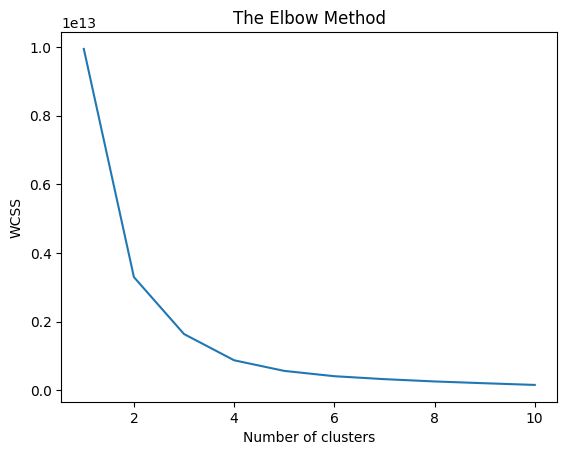

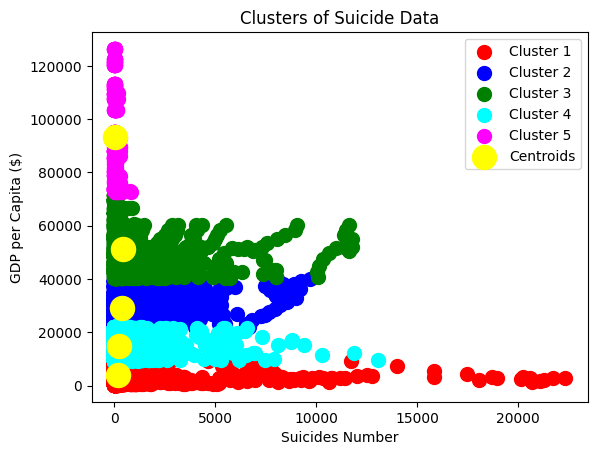

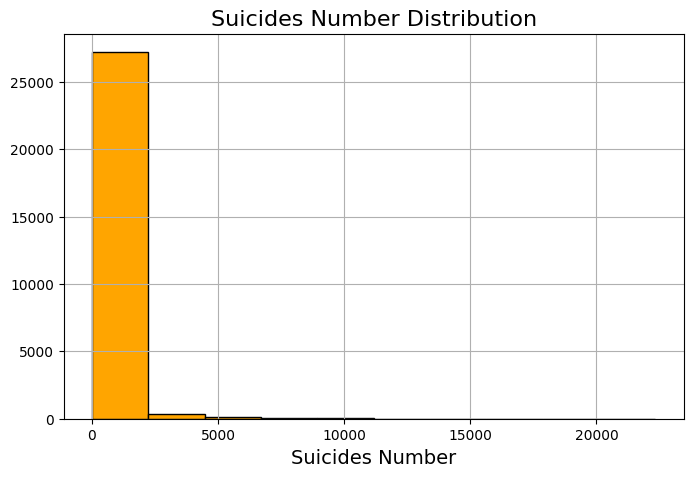

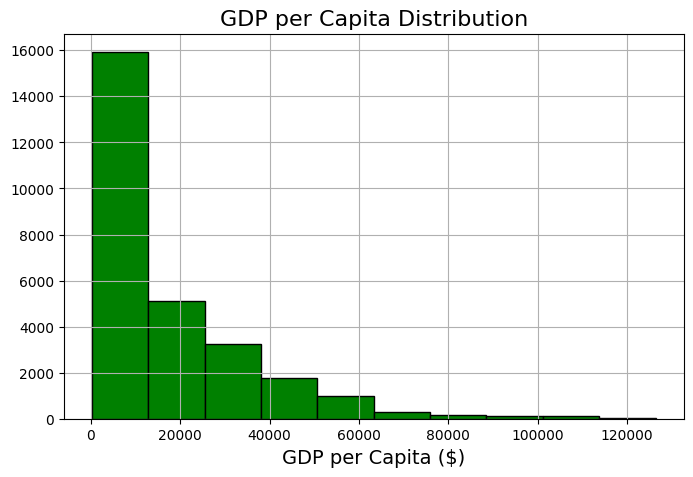

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv')

# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows to check the data structure
print(df.head())

# Selecting relevant columns for clustering (suicides_no and gdp_per_capita)
X = df[['suicides_no', 'gdp_per_capita ($)']].values

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting KMeans with the chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Adding labels and title
plt.title('Clusters of Suicide Data')
plt.xlabel('Suicides Number')
plt.ylabel('GDP per Capita ($)')
plt.legend()
plt.show()

# Plotting the distribution of suicides number
plt.figure(figsize=(8, 5))
plt.title("Suicides Number Distribution", fontsize=16)
plt.xlabel("Suicides Number", fontsize=14)
plt.grid(True)
plt.hist(df['suicides_no'], color='orange', edgecolor='k')
plt.show()

# Plotting the distribution of GDP per capita
plt.figure(figsize=(8, 5))
plt.title("GDP per Capita Distribution", fontsize=16)
plt.xlabel("GDP per Capita ($)", fontsize=14)
plt.grid(True)
plt.hist(df['gdp_per_capita ($)'], color='green', edgecolor='k')
plt.show()
